In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

## Testing the K-means algorithm

In [2]:
np.random.seed(0)

In [3]:
centroids = [[4,4], [-2, 1], [2, -3], [1,1]]
x, y = make_blobs(n_samples = 5000,
                 centers = centroids,
                 cluster_std = 0.9)

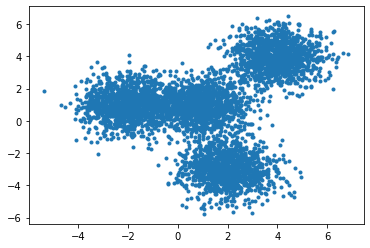

In [4]:
plt.scatter(x[:, 0], x[:, 1], marker = ".")

In [5]:
kmeans = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [6]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
kmeans_labels = kmeans.labels_
kmeans_labels

array([3, 2, 2, ..., 0, 3, 3])

In [8]:
kmeans_cc = kmeans.cluster_centers_
kmeans_cc

array([[ 3.97334234,  3.98758687],
       [ 0.99463358,  0.97011938],
       [ 1.9992416 , -3.02272243],
       [-2.04443402,  1.00712894]])

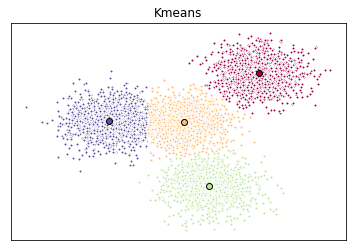

In [9]:
fig = plt.figure(figsize = (6,4))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(centroids)), colors):
    
    my_members = (kmeans_labels == k)
    
    cluster_center = kmeans_cc[k]
    
    ax.plot(x[my_members, 0], x[my_members, 1], "w",
            markerfacecolor = col, marker =".")
    ax.plot(cluster_center[0], cluster_center[1], "o",
            markerfacecolor = col, markeredgecolor = "k", markersize = 6)
ax.set_title("Kmeans")

ax.set_xticks(())
ax.set_yticks(())
plt.show()

# Airbnb NYC Customer Segmentation
Airbnb does not distinguish between indivuduals renting appartments and individuals running businesses without getting any license and paying the proper taxes. This project tries to make different profiles of users depending on how many listings (appartments/rooms/houses) they have

### Data overview

In [2]:
df = pd.read_csv("C:\\Users\\caflo\\Downloads\\new-york-city-airbnb-open-data (1)\\AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
bnb = df.drop(["name", "host_id", "neighbourhood", "host_name", "last_review"], axis = 1)
bnb = bnb.dropna()
bnb.head()

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


In [5]:
bnb.isnull().any()

id                                False
neighbourhood_group               False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

## What are the neightborhood groups with the most Arbnbs?

In [7]:
import seaborn as sns

Text(0.5, 1.0, 'Airbnbs per neightborhood group')

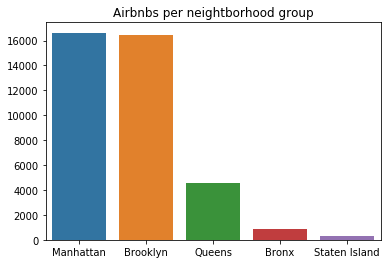

In [8]:
airbnb_by_nbh = bnb["neighbourhood_group"].value_counts()
x = airbnb_by_nbh.index
y = airbnb_by_nbh.values

sns.barplot(x = x, y = y, log = False)
plt.title("Airbnbs per neightborhood group")

Text(0.5, 1.0, 'Airbnbs per room type')

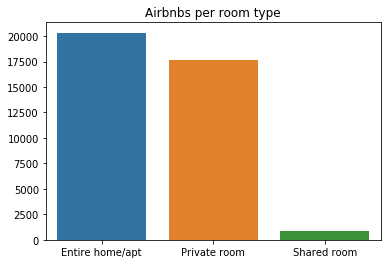

In [9]:
airbnb_by_nbh = bnb["room_type"].value_counts()
x = airbnb_by_nbh.index
y = airbnb_by_nbh.values

sns.barplot(x = x, y = y, log = False)
plt.title("Airbnbs per room type")

In [10]:
bnb.shape

(38843, 11)

In [11]:
bnb["neighbourhood_group"].value_counts() / bnb["neighbourhood_group"].value_counts().sum()

Manhattan        0.428185
Brooklyn         0.423422
Queens           0.117756
Bronx            0.022552
Staten Island    0.008084
Name: neighbourhood_group, dtype: float64

In [12]:
bnb["room_type"].value_counts() / bnb["room_type"].value_counts().sum()

Entire home/apt    0.523441
Private room       0.454779
Shared room        0.021780
Name: room_type, dtype: float64

Text(0.5, 1.0, 'Host listings overview')

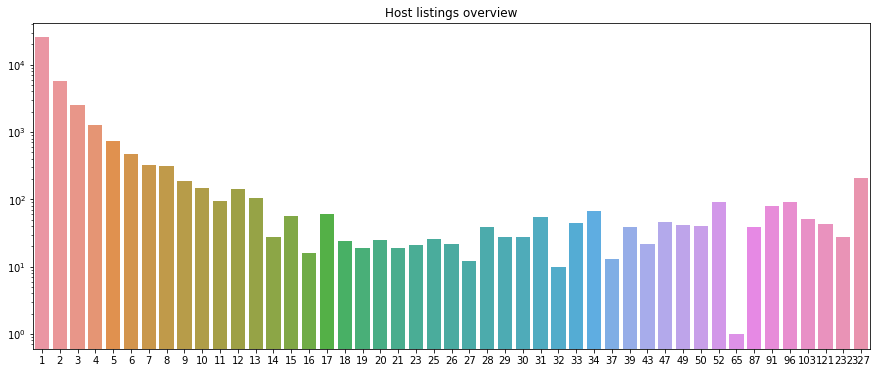

In [13]:
airbnb_by_host_listings = bnb["calculated_host_listings_count"].value_counts()

x = airbnb_by_host_listings.index
y = airbnb_by_host_listings.values

plt.figure(figsize = (15, 6))
sns.barplot(x, y, log = True)
plt.title("Host listings overview")

## Clustering users by cordinates (just to test the algorithm), and overview of the locations of the Airnbnbs

In [14]:
loc = bnb[["longitude", "latitude"]].values
loc = np.asanyarray(loc)
loc[:5]

array([[-73.97237,  40.64749],
       [-73.98377,  40.75362],
       [-73.95976,  40.68514],
       [-73.94399,  40.79851],
       [-73.975  ,  40.74767]])

In [15]:
kmeanloc = KMeans(n_clusters = 5, init = "k-means++", n_init = 10)
kmeanloc

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
kmeanloc.fit(loc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
kmeanloc_labels = kmeanloc.labels_
kmeanloc_cc = kmeanloc.cluster_centers_

In [18]:
kmeanloc_cc

array([[-73.93709291,  40.69705549],
       [-73.98663966,  40.73910969],
       [-73.93833102,  40.80474528],
       [-73.98433694,  40.65472317],
       [-73.81993685,  40.71083781]])

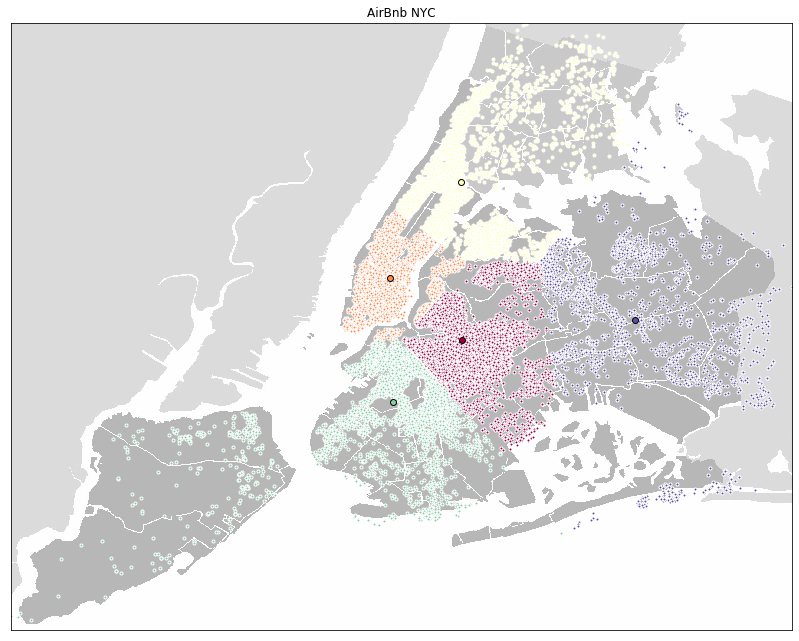

In [19]:
import matplotlib.image as mpimg

nyc_img=mpimg.imread('nyc.png', 0)

fig = plt.figure(figsize = (14, 19))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(set(kmeanloc_labels)))))
ax = fig.add_subplot(1, 1, 1)

plt.imshow(nyc_img, extent=[-74.24441999999999, -73.71299, 40.4997, 40.913059999999994], alpha=0.5)

for k, c in zip(range(len(kmeanloc_cc)), colors):
    my_members = (kmeanloc_labels == k)
    cluster_center = kmeanloc_cc[k]
    
    ax.plot(loc[my_members, 0], loc[my_members, 1], "w",
        markerfacecolor = c, marker = ".", linewidth=0)
    ax.plot(cluster_center[0], cluster_center[1], "o",
        markerfacecolor = c, markeredgecolor = "k", markersize = 6)
    
ax.set_title("AirBnb NYC")
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [20]:
bnb.head()

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


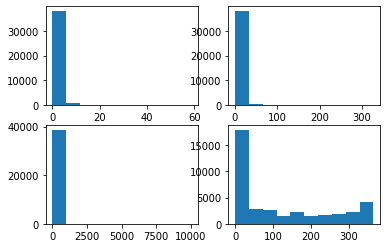

In [21]:
fig, axs = plt.subplots(2,2)

axs[0,0].hist(bnb["reviews_per_month"])
axs[0,1].hist(bnb["calculated_host_listings_count"])
axs[1,0].hist(bnb["price"])
axs[1,1].hist(bnb["availability_365"])

plt.show()

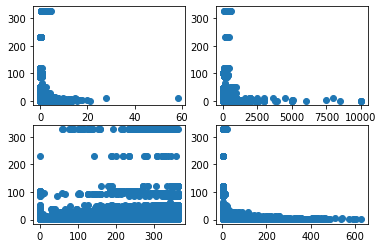

<Figure size 1080x504 with 0 Axes>

In [22]:
fig, axs = plt.subplots(2,2)

axs[0,0].scatter(bnb["reviews_per_month"], bnb["calculated_host_listings_count"])
axs[0,1].scatter(bnb["price"], bnb["calculated_host_listings_count"])
axs[1,0].scatter(bnb["availability_365"], bnb["calculated_host_listings_count"])
axs[1,1].scatter(bnb["number_of_reviews"], bnb["calculated_host_listings_count"])

plt.figure(figsize = (15, 7))
plt.show()

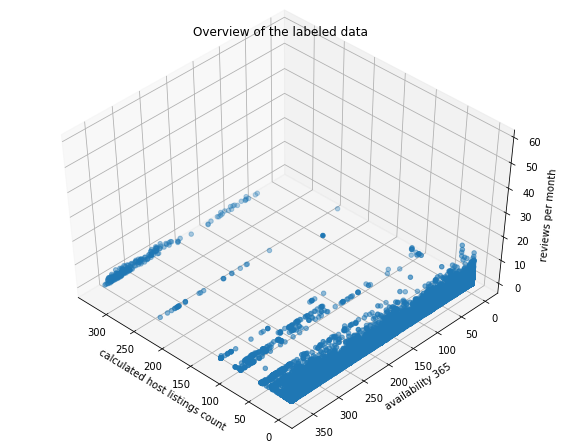

In [23]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('calculated host listings count')
ax.set_ylabel('availability 365')
ax.set_zlabel('reviews per month')
ax.set_title("Overview of the labeled data")
ax.scatter(xs = bnb["calculated_host_listings_count"], ys = bnb["availability_365"], zs = bnb["reviews_per_month"])

## Data preprocessing
### Transform strings to numeric data

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
columns = ["room_type", "price", "reviews_per_month", "calculated_host_listings_count", "availability_365"]
X = bnb[columns]
X = X.values
X[:2]

array([['Private room', 149, 0.21, 6, 365],
       ['Entire home/apt', 225, 0.38, 2, 355]], dtype=object)

In [26]:
room = list(pd.get_dummies(bnb["room_type"]).columns)
le_room = LabelEncoder()
le_room.fit(room)
X[:, 0] = le_room.transform(X[:, 0])

## Normalize the data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
airbnb = StandardScaler().fit_transform(X)
airbnb[:5]

array([[ 0.92589887,  0.03392885, -0.6922205 ,  0.03177535,  1.93078055],
       [-0.91976929,  0.41982714, -0.59105534, -0.12034294,  1.85358549],
       [-0.91976929, -0.27072769,  1.94402463, -0.15837251,  0.61074502],
       [-0.91976929, -0.31642617, -0.75768031, -0.15837251, -0.88683914],
       [-0.91976929,  0.29288691, -0.46608661, -0.15837251,  0.10897713]])

## Testing the K-means algorithm for different values of K

In [29]:
Ks = np.arange(2, 15)
Errors = [0.0] * Ks.shape[0]

for num in range(2, 15):
    clusternum = num
    k_means = KMeans(init = "k-means++", n_clusters = clusternum, n_init = 12)
    k_means.fit(airbnb)
    labels = k_means.labels_
    cc = k_means.cluster_centers_
    sum_ = 0
    for center in range(clusternum):
        sum_ += ((airbnb[(labels == center)] - cc[center])**2).sum()
    Errors[num - 2] = ((sum_ / airbnb.shape[0]))

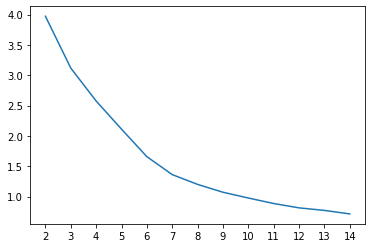

In [30]:
plt.plot(Ks, Errors)
plt.xticks(Ks)
plt.show()

## Final model training using K = 6

In [31]:
clusternum = 6
k_means = KMeans(init = "k-means++", n_clusters = clusternum, n_init = 12)
k_means.fit(airbnb)
cc = k_means.cluster_centers_
labels = k_means.labels_

In [32]:
print(labels.shape)
print(cc)
print(len(cc))

(38843,)
[[-4.84199022e-03 -7.71125088e-02  2.02822089e+00 -1.17278541e-01
   2.35451366e-01]
 [-9.18633758e-01  2.03049199e-01 -3.84079813e-01 -1.32193729e-01
  -6.21477038e-01]
 [ 2.80454711e-02  1.00118565e-01 -1.30154983e-01  1.05365534e-01
   1.49255227e+00]
 [-8.56938036e-01  6.58280301e-01  2.04844803e-01  1.18088053e+01
   1.32360034e+00]
 [ 1.01252716e+00 -3.29641655e-01 -3.24996629e-01 -1.20333256e-01
  -5.67151870e-01]
 [-5.09620812e-01  3.19746283e+01 -4.67078425e-01 -8.65388762e-02
   5.45986946e-01]]
6


## Labeling the data

In [33]:
bnb["Group"] = labels + 1
bnb = bnb.merge(pd.get_dummies(bnb[["neighbourhood_group"]]), left_index = True, right_index = True)
print(bnb.shape)
bnb.to_csv(r"Airbnb_nyc_final.csv", index = False, header = True)
bnb.head()

(38843, 17)


,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Group,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2539,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,3,0,1,0,0,0
1,2595,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,3,0,0,1,0,0
3,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,1,0,1,0,0,0
4,5022,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2,0,0,1,0,0
5,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,2,0,0,1,0,0


In [34]:
bnb = pd.read_csv("Airbnb_nyc_final.csv")

## Group Profiles

Group 4 has the largest listing count, thus this is our outlayer

In [35]:
bnb.groupby('Group').mean()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
Group,,,,,,,,,,,,,,
1,2.344976e+07,40.728642,-73.940104,127.020825,2.181911,83.481829,4.782626,2.081258,145.379747,0.032871,0.383013,0.391180,0.181707,0.011229
2,1.674710e+07,40.727599,-73.962524,182.286351,6.041215,16.620300,0.728597,1.680892,34.360477,0.009535,0.419762,0.497347,0.069127,0.004229
3,1.621593e+07,40.726953,-73.946988,162.051219,9.695833,33.859036,1.154884,7.942941,308.229136,0.032798,0.394923,0.408739,0.147029,0.016511
4,3.227353e+07,40.717765,-74.003572,271.961702,7.748936,5.574468,1.717447,315.680851,286.344681,0.000000,0.000000,1.000000,0.000000,0.000000
5,1.850259e+07,40.729607,-73.945267,77.453327,4.258147,17.831212,0.826817,2.002376,41.469111,0.025373,0.474287,0.370333,0.125170,0.004837
6,1.548618e+07,40.730828,-73.960247,6439.500000,19.944444,4.666667,0.588333,2.888889,185.611111,0.000000,0.388889,0.555556,0.055556,0.000000


In [36]:
bnb.groupby('Group').count()

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
Group,,,,,,,,,,,,,,,,
1,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898
2,13005,13005,13005,13005,13005,13005,13005,13005,13005,13005,13005,13005,13005,13005,13005,13005
3,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903
4,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235
5,11784,11784,11784,11784,11784,11784,11784,11784,11784,11784,11784,11784,11784,11784,11784,11784
6,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18


In [37]:
bnb.head(5)

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Group,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2539,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,3,0,1,0,0,0
1,2595,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,3,0,0,1,0,0
2,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,1,0,1,0,0,0
3,5022,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2,0,0,1,0,0
4,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,2,0,0,1,0,0


<Figure size 1296x1584 with 0 Axes>

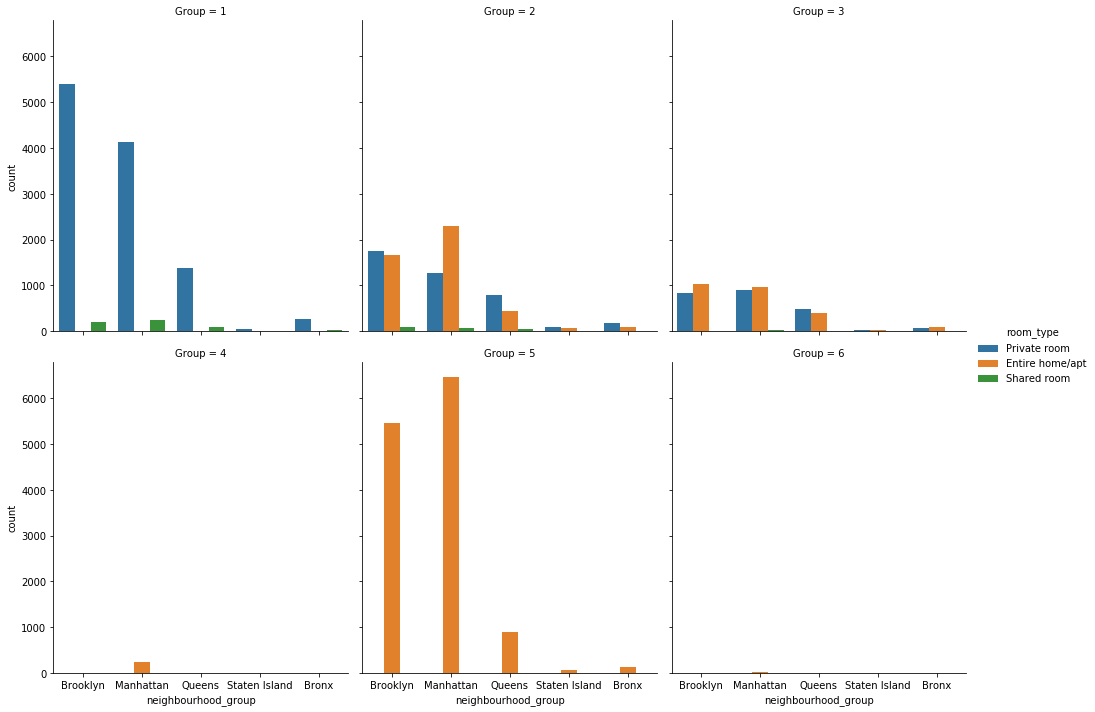

In [43]:
plt.figure(figsize = (18, 22))
sns.catplot(x = "neighbourhood_group", hue = "room_type",
            col = "Group", col_wrap = 3,
            data = bnb, kind = "count",
            aspect = 0.9)

plt.show()

<Figure size 720x2160 with 0 Axes>

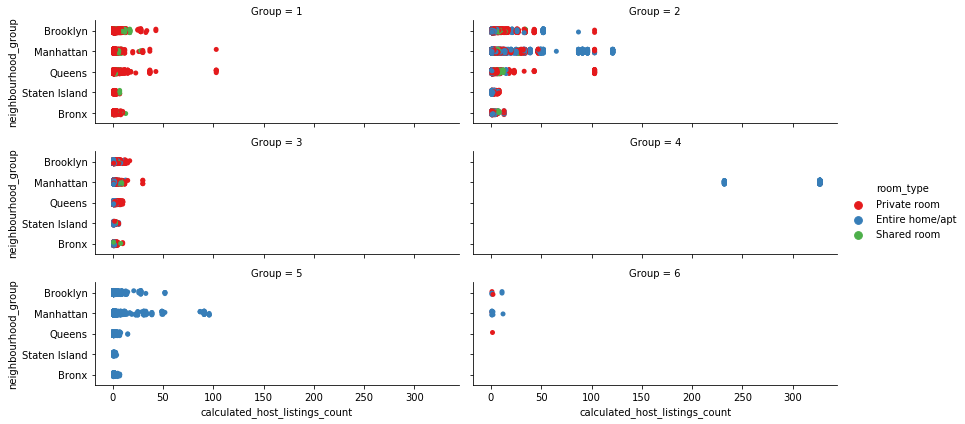

In [100]:
plt.figure(figsize = (10, 30))
sns.catplot(x = "calculated_host_listings_count", y = "neighbourhood_group",
           hue = "room_type", col = "Group", data = bnb, col_wrap = 2,
           height = 2, aspect = 3, palette = "Set1")
plt.show()

<Figure size 720x2160 with 0 Axes>

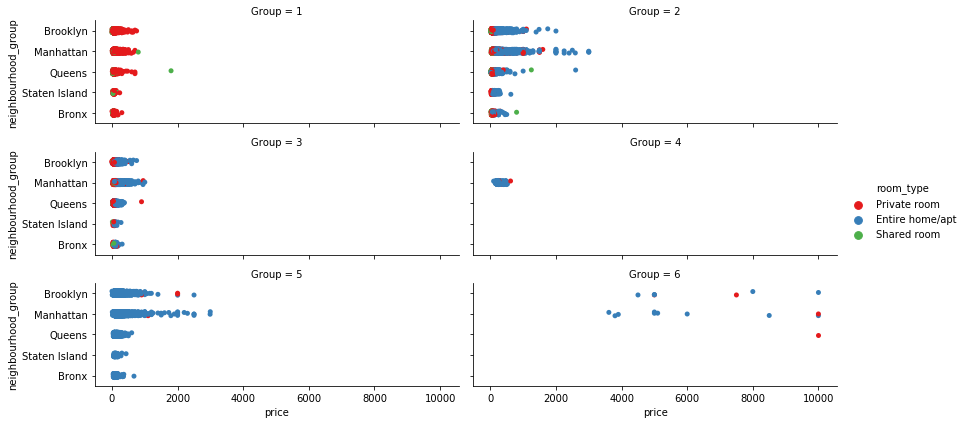

In [46]:
plt.figure(figsize = (10, 30))
sns.catplot(x = "price", y = "neighbourhood_group",
           hue = "room_type", col = "Group", data = bnb, col_wrap = 2,
           height = 2, aspect = 3, palette = "Set1")
plt.show()

In [47]:
bnb[bnb["Group"] == 4].groupby("room_type").count()

,id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Group,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
room_type,,,,,,,,,,,,,,,,
Entire home/apt,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227
Private room,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


## 2D plotting of the labeled data

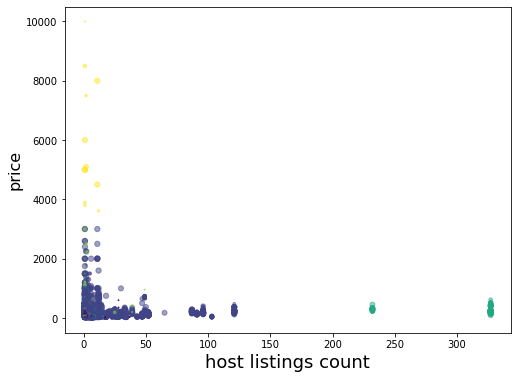

In [48]:
plt.figure(figsize=(8, 6))

area = np.pi * (bnb["availability_365"] * 3/365)**2
plt.scatter(bnb["calculated_host_listings_count"], bnb["price"], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('host listings count', fontsize=18)
plt.ylabel('price', fontsize=16)

plt.show()

In [49]:
bnb["room_type"].drop_duplicates()

0        Private room
1     Entire home/apt
39        Shared room
Name: room_type, dtype: object

## 3D Plotting of the labeled data

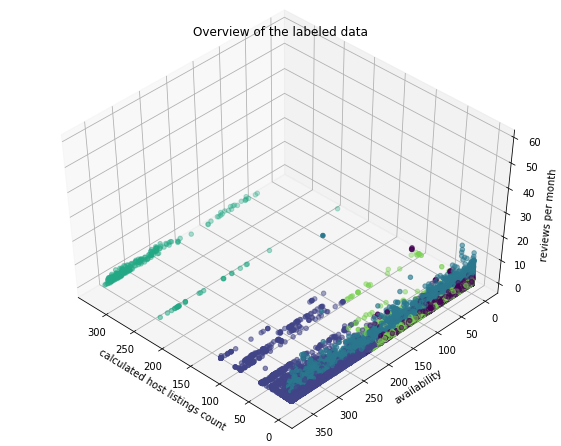

In [50]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('calculated host listings count')
ax.set_ylabel('availability')
ax.set_zlabel('reviews per month')
ax.set_title("Overview of the labeled data")
ax.scatter(bnb["calculated_host_listings_count"], bnb["availability_365"], bnb["reviews_per_month"], c= labels.astype(np.float))

## Data visualization over NYC

In [51]:
ccs = []
for k in range(clusternum):
    ccs.append([(loc[(labels == k), 0]).mean(), (loc[(labels == k), 1]).mean()])

In [52]:
len(ccs)

6

In [53]:
bnb.latitude.min(), bnb.latitude.max(), bnb.longitude.min(), bnb.longitude.max()

(40.506409999999995, 40.913059999999994, -74.24441999999999, -73.71299)

In [54]:
coordinates = [-74.24441999999999, -73.71299, 40.486409999999995, 40.913059999999994]

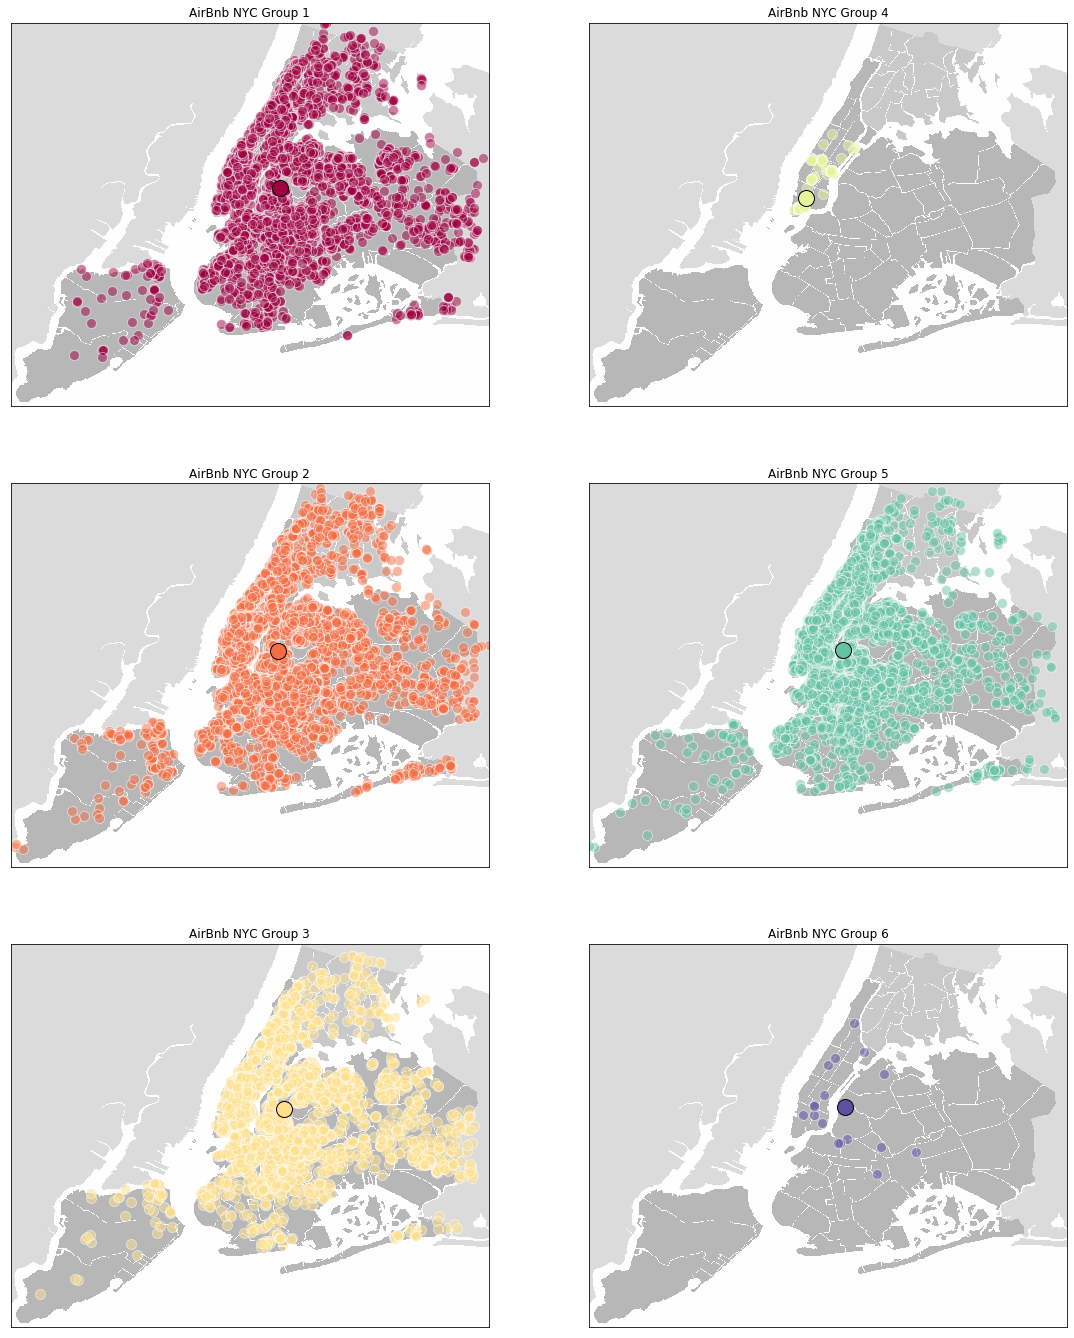

In [93]:
import matplotlib.image as mpimg

nyc_img=mpimg.imread('nyc.png', 0)

size = 30

fig, ax = plt.subplots(3, 2, figsize = (size - 11, size -6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(ccs)))

for k in range(6):
    c = colors[k]

    my_members = (labels == k)
    cluster_center = ccs[k]
    
    div = 3
    ax[k % div, k // div].imshow(nyc_img, extent=coordinates, alpha=0.5)
    ax[k % div, k // div].plot(loc[my_members, 0], loc[my_members, 1], "w",
        markerfacecolor = c, marker = ".", linewidth=0, markersize = 20, alpha = 0.5)
    ax[k % div, k // div].plot(cluster_center[0], cluster_center[1], "o",
        markerfacecolor = c, markeredgecolor = "k", markersize = 16)

    ax[k % div, k // div].set_title("AirBnb NYC Group {}".format(k + 1))
    ax[k % div, k // div].set_xticks(())
    ax[k % div, k // div].set_yticks(())
plt.show()

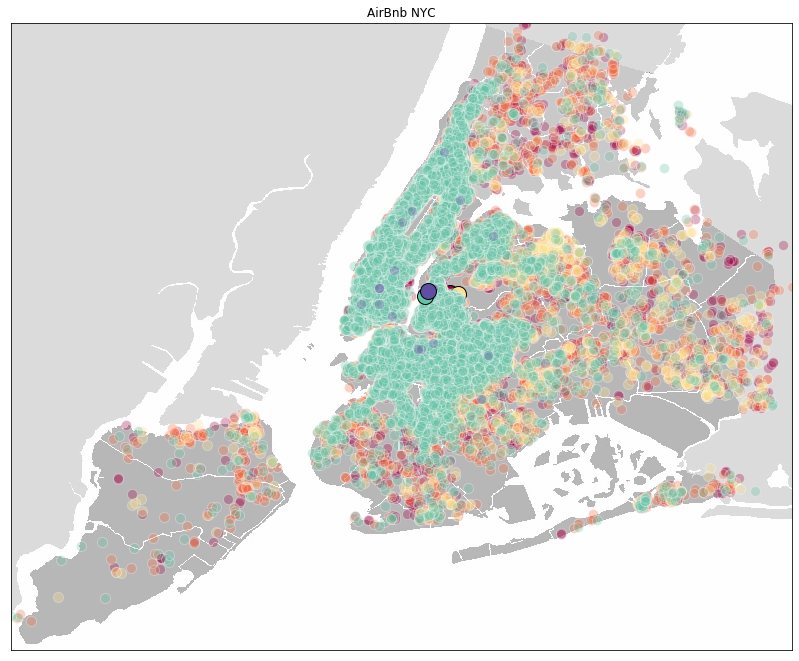

In [55]:
import matplotlib.image as mpimg

nyc_img=mpimg.imread('nyc.png', 0)

fig = plt.figure(figsize = (14, 19))
colors = plt.cm.Spectral(np.linspace(0, 1, len(ccs)))
ax = fig.add_subplot(1, 1, 1)

plt.imshow(nyc_img, extent= coordinates, alpha=0.5)

for k, c in zip(range(len(ccs)), colors):
    my_members = (labels == k)
    cluster_center = ccs[k]
    
    ax.plot(loc[my_members, 0], loc[my_members, 1], "w",
        markerfacecolor = c, marker = ".", linewidth=0, markersize = 20, alpha = 0.3)
    ax.plot(cluster_center[0], cluster_center[1], "o",
        markerfacecolor = c, markeredgecolor = "k", markersize = 16)
    
ax.set_title("AirBnb NYC")
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [57]:
bnb.groupby('Group').mean()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
Group,,,,,,,,,,,,,,
1,1.850234e+07,40.729607,-73.945261,77.395603,4.257511,17.833050,0.826832,2.000255,41.430317,0.025378,0.474368,0.370226,0.125191,0.004838
2,1.621678e+07,40.726953,-73.946997,162.108591,9.695452,33.853004,1.154791,7.944413,308.220550,0.032791,0.394834,0.408871,0.146996,0.016508
3,2.344976e+07,40.728642,-73.940104,127.020825,2.181911,83.481829,4.782626,2.081258,145.379747,0.032871,0.383013,0.391180,0.181707,0.011229
4,3.227353e+07,40.717765,-74.003572,271.961702,7.748936,5.574468,1.717447,315.680851,286.344681,0.000000,0.000000,1.000000,0.000000,0.000000
5,1.674710e+07,40.727599,-73.962524,182.286351,6.041215,16.620300,0.728597,1.680892,34.360477,0.009535,0.419762,0.497347,0.069127,0.004229
6,1.548618e+07,40.730828,-73.960247,6439.500000,19.944444,4.666667,0.588333,2.888889,185.611111,0.000000,0.388889,0.555556,0.055556,0.000000


In [58]:
import seaborn as sns

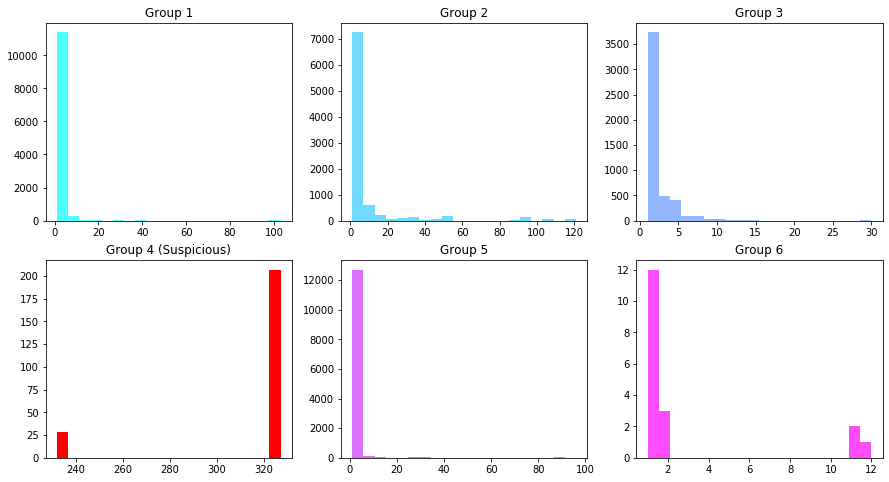

In [59]:
fig, axs = plt.subplots(2, 3, figsize = (15, 8))

colors = plt.cm.cool(np.linspace(0, 1, len(ccs)))

for group in range(1, len(ccs) + 1):
        x = bnb[bnb["Group"] == group]["calculated_host_listings_count"]
        i = (group - 1) // 3
        j = (group - 1) % 3
        title = "Group {}".format(group)
        color = colors[group - 1][:]
        color[3] = 0.7
        if (group) == 4:
            title += " (Suspicious)"
            color = "red"
        axs[i, j].hist(x, color = color, bins = 20)
        axs[i, j].set_title(label = title)
        group += 1

plt.show()

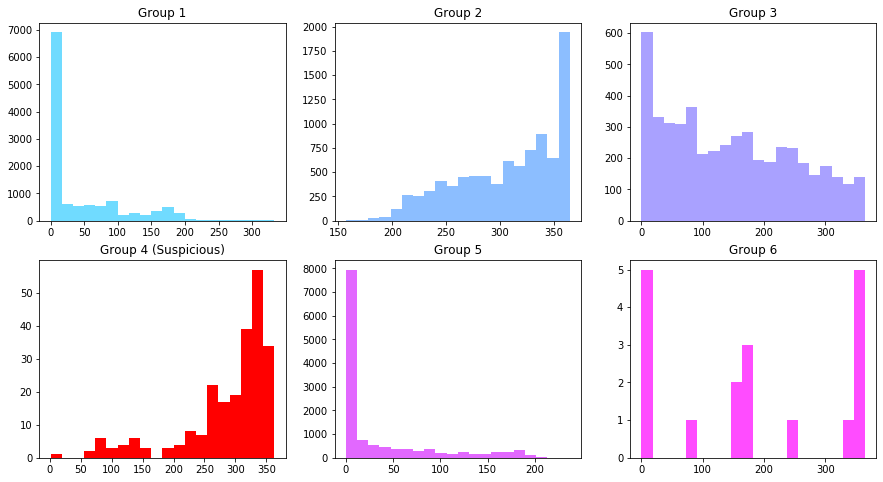

In [60]:
fig, axs = plt.subplots(2, 3, figsize = (15, 8))

colors = plt.cm.cool(np.linspace(0.2, 1, len(ccs)))

for group in range(1, len(ccs) + 1):
        i = (group - 1) // 3
        j = (group - 1) % 3
        title = "Group {}".format(group)
        color = colors[group - 1][:]
        color[3] = 0.7
        if group == 4:
            title += " (Suspicious)"
            color = "red"
        x = bnb[bnb["Group"] == group]["availability_365"]
        axs[i, j].hist(x, color = color, bins = 20)
        
        axs[i, j].set_title(label = title)
        group += 1

plt.show()

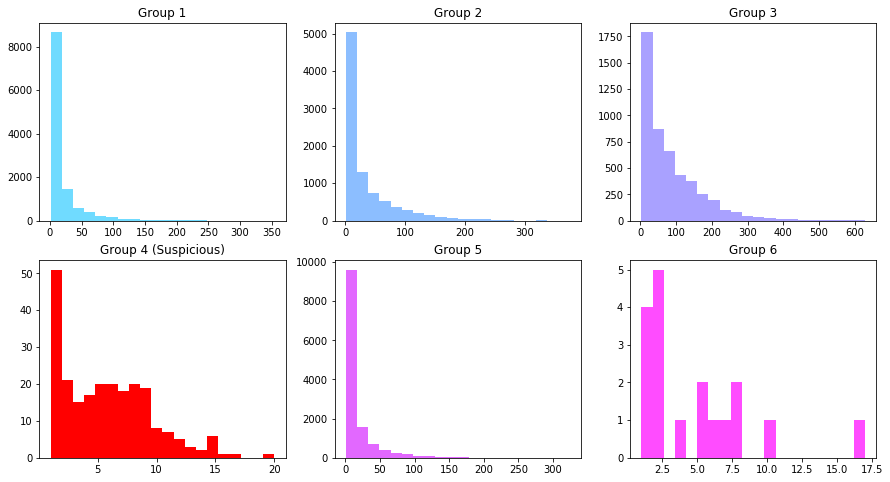

In [94]:
fig, axs = plt.subplots(2, 3, figsize = (15, 8))

colors = plt.cm.cool(np.linspace(0.2, 1, len(ccs)))

for group in range(1, len(ccs) + 1):
        i = (group - 1) // 3
        j = (group - 1) % 3
        title = "Group {}".format(group)
        color = colors[group - 1][:]
        color[3] = 0.7
        if group == 4:
            title += " (Suspicious)"
            color = "red"
        x = bnb[bnb["Group"] == group]["number_of_reviews"]
        axs[i, j].hist(x, color = color, bins = 20)
        
        axs[i, j].set_title(label = title)
        group += 1

plt.show()

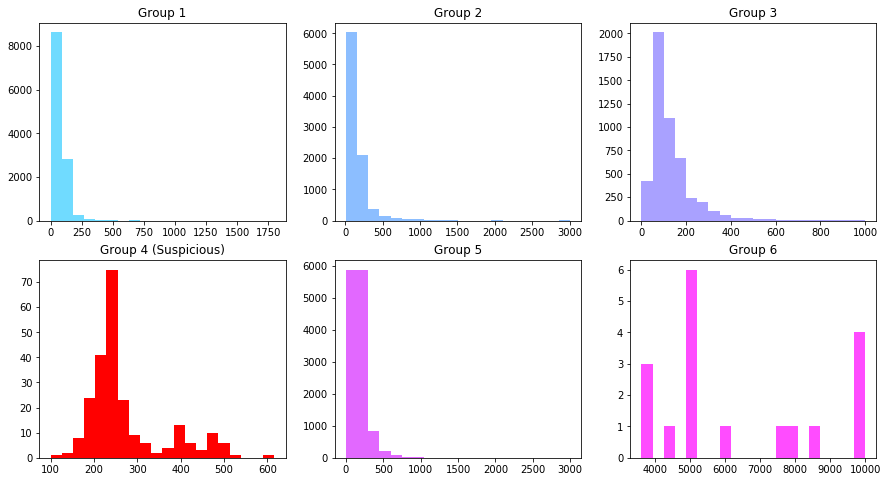

In [95]:
fig, axs = plt.subplots(2, 3, figsize = (15, 8))

colors = plt.cm.cool(np.linspace(0.2, 1, len(ccs)))

for group in range(1, len(ccs) + 1):
        i = (group - 1) // 3
        j = (group - 1) % 3
        title = "Group {}".format(group)
        color = colors[group - 1][:]
        color[3] = 0.7
        if group == 4:
            title += " (Suspicious)"
            color = "red"
        x = bnb[bnb["Group"] == group]["price"]
        axs[i, j].hist(x, color = color, bins = 20)
        
        axs[i, j].set_title(label = title)
        group += 1

plt.show()

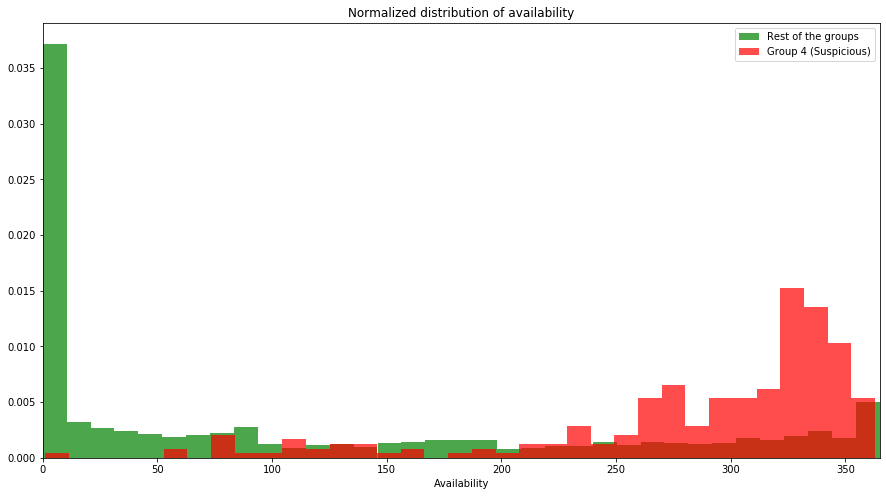

In [96]:
plt.figure(figsize = (15, 8))

plt.title("Normalized distribution of availability")
colors = plt.cm.Spectral(np.linspace(0.2, 1, 9))

x_ = bnb[bnb["Group"] != 4]["availability_365"]
label_x_ = "Rest of the groups"
plt.hist(x_, color = "green", alpha = 0.7, density = True, label = label_x_, bins = 35)

x = bnb[bnb["Group"] == 4]["availability_365"]
label_x = "Group 4 (Suspicious)"
plt.hist(x, color = "red", alpha = 0.7, density = True, label = label_x, bins = 35)

plt.xlim(0, 365)
plt.xlabel("Availability")
plt.legend()
plt.show()

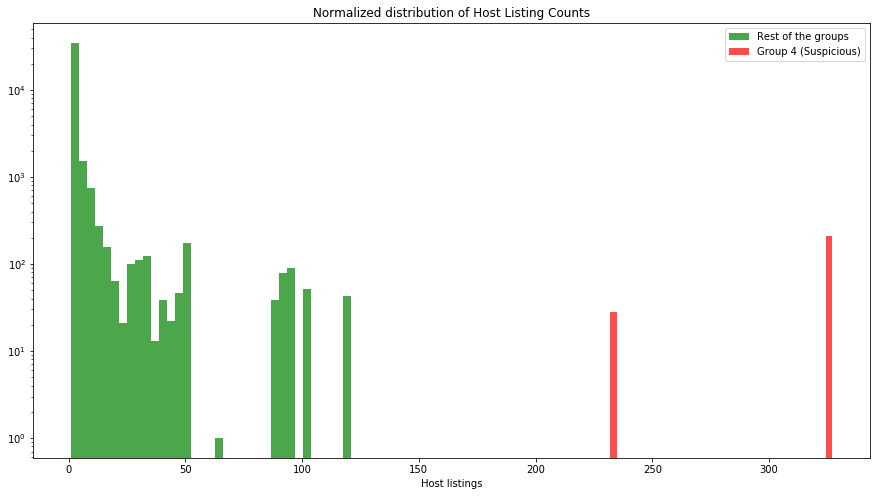

In [97]:
plt.figure(figsize = (15, 8))

plt.title("Normalized distribution of Host Listing Counts")
colors = plt.cm.Spectral(np.linspace(0, 1, 9))

x_ = bnb[bnb["Group"] != 4]["calculated_host_listings_count"]
label_x_ = "Rest of the groups"
plt.hist(x_, color = "green", alpha = 0.7, density = False, label = label_x_, bins = 35, log = True)

x = bnb[bnb["Group"] == 4]["calculated_host_listings_count"]
label_x = "Group 4 (Suspicious)"
plt.hist(x, color = "red", alpha = 0.7, density = False, label = label_x, bins = 35, log = True)

plt.xlabel("Host listings")
plt.legend()
plt.show()

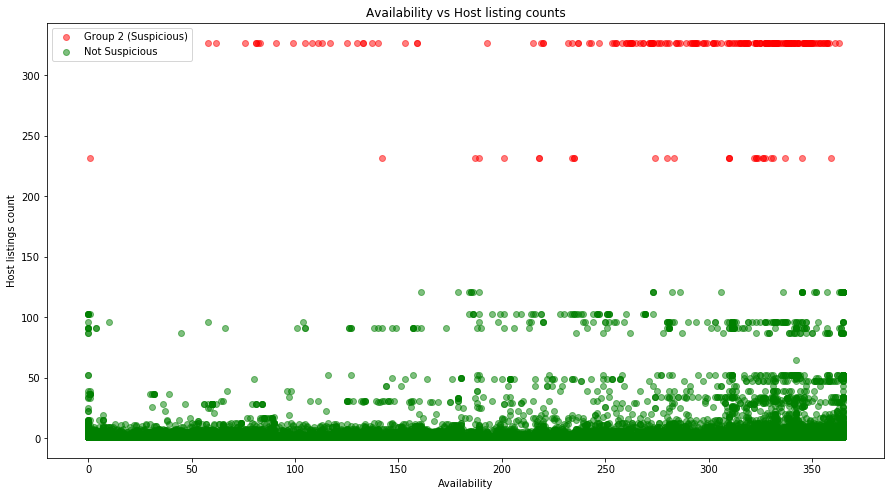

In [98]:
plt.figure(figsize = (15, 8))

plt.title("Availability vs Host listing counts")
colors = plt.cm.Spectral(np.linspace(0, 1, 9))
filt = bnb["Group"] == 4
plt.scatter(x = bnb[filt]["availability_365"], y = bnb[filt]["calculated_host_listings_count"], color = "red", alpha = 0.5, label = "Group 2 (Suspicious)")
plt.scatter(x = bnb[~filt]["availability_365"], y = bnb[~filt]["calculated_host_listings_count"], color = "green", alpha = 0.5, label = "Not Suspicious")

plt.xlabel("Availability")
plt.ylabel("Host listings count")

plt.legend()
plt.show()

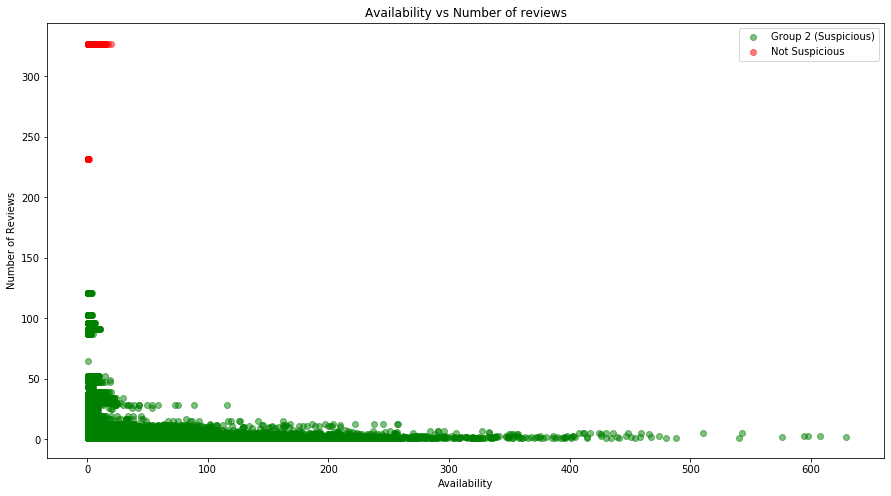

In [99]:
plt.figure(figsize = (15, 8))

plt.title("Availability vs Number of reviews")
colors = plt.cm.Spectral(np.linspace(0, 1, 9))
filt = bnb["Group"] == 4

plt.scatter(x = bnb[~filt]["number_of_reviews"], y = bnb[~filt]["calculated_host_listings_count"], color = "green", alpha = 0.5, label = "Group 2 (Suspicious)")
plt.scatter(x = bnb[filt]["number_of_reviews"], y = bnb[filt]["calculated_host_listings_count"], color = "red", alpha = 0.5, label = "Not Suspicious")

plt.xlabel("Availability")
plt.ylabel("Number of Reviews")

plt.legend()
plt.show()